In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate, integrate
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/63220629/inverse-of-numpy-gradient-function

In [2]:
df = pd.read_excel('./Trial-Wireup 2.xlsx')

In [3]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
z = df['Delay'].to_numpy()

In [4]:
r = np.stack([x, y]).T

In [5]:
#S = interpolate.LinearNDInterpolator(r, z)
#S = interpolate.CloughTocher2DInterpolator(r, z)
#S = interpolate.NearestNDInterpolator(r, z)
S = interpolate.Rbf(x, y, z, epsilon=0.1, function='thin_plate')

In [6]:
N = 200
xl = np.linspace(x.min(), x.max(), N)
yl = np.linspace(y.min(), y.max(), N)
X, Y = np.meshgrid(xl, yl)

In [7]:
#Zp = S(np.stack([X.ravel(), Y.ravel()]).T)
Zp = S(X.ravel(), Y.ravel())

In [8]:
Z = Zp.reshape(X.shape)

In [9]:
dZdy, dZdx = np.gradient(Z, yl, xl, edge_order=1)

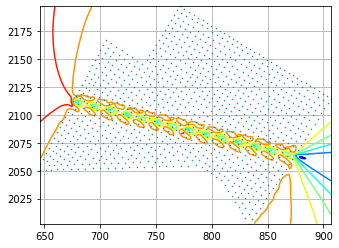

In [10]:
axe = plt.contour(X, Y, np.hypot(dZdx, dZdy), cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

In [11]:
SdZx = np.nancumsum(dZdx, axis=1)*np.diff(xl)[0]
SdZy = np.nancumsum(dZdy, axis=0)*np.diff(yl)[0]

Zhat = np.zeros(SdZx.shape)
for i in range(Zhat.shape[0]):
    for j in range(Zhat.shape[1]):
        #Zhat[i,j] += np.nansum([SdZy[i,0], -SdZy[0,0], SdZx[i,j], -SdZx[i,0]])
        #Zhat[i,j] += np.nansum([SdZx[0,N//2], SdZy[i,N//2], SdZx[i,j], -SdZx[i,N//2]])
        Zhat[i,j] += np.nansum([SdZy[N//2,0], SdZx[N//2,j], SdZy[i,j], -SdZy[N//2,j]])
        
Zhat += Z[100,100] - Zhat[100,100]

In [12]:
np.all(np.isnan(Zhat))

False

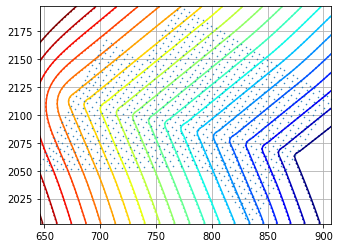

In [13]:
lz = np.linspace(0, 5000, 20)
axe = plt.contour(X, Y, Z, lz, cmap='jet')
axe = plt.contour(X, Y, Zhat, lz, cmap='jet', linestyles=':')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()